In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

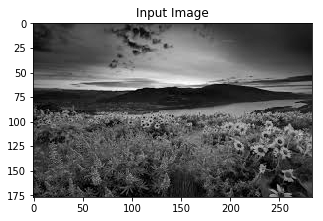

In [82]:
#Input image

inputImage = cv2.imread("./scenery.jpg",0)
f = plt.figure(figsize=(5,5))
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
plt.show()

**Transformation using Nearest Neighbour**



In [0]:
#Nearest Neighbor
def nearestNeighbour(inputImage,givenMask):
    targetImage = np.zeros([len(inputImage), len(inputImage[0])])
    translateMaskInv = np.linalg.inv(givenMask)
    
    for row in range(0,targetImage.shape[0]):
        for col in range(targetImage.shape[1]):
            image = np.float32([[row],[col],[1]])
            SrcImage=np.matmul(translateMaskInv,image)
            tempImage = np.round(SrcImage).astype(int)
            #print(tempImage)
            Tx= tempImage[0,0]
            Ty= tempImage[1,0]
            #print(Ty)
            #print(Tx)
            
            #To exclude negative values
            if((Tx > 0 and Tx < inputImage.shape[0]) and (Ty >0 and Ty<inputImage.shape[1])):      
                   targetImage[row,col] = inputImage[Tx,Ty]
            
            finalTargetImage= targetImage.astype(int)
    return finalTargetImage


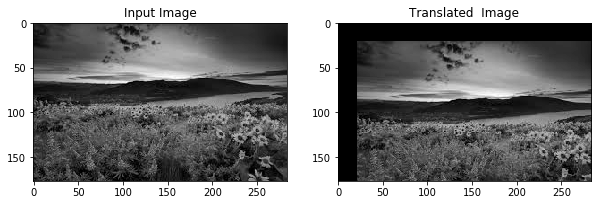

In [84]:
#Translation using NN
translateMask = np.float32([[1,0,20],[0,1,20],[0,0,1]])
imageTranslated = nearestNeighbour(inputImage,translateMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Translated  Image")
plt.imshow(imageTranslated,cmap = plt.get_cmap('gray'))
plt.show()

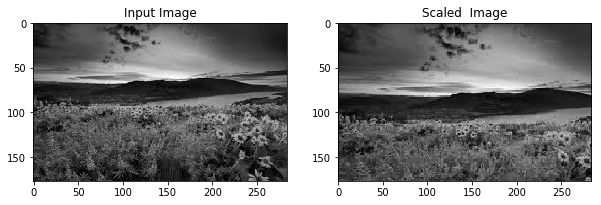

In [85]:
#Scaling using NN

scalingMask = np.float32([[1.2,0,0],[0,1.2,0],[0,0,1]])
imageScaled = nearestNeighbour(inputImage,scalingMask) 

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Scaled  Image")
plt.imshow(imageScaled,cmap = plt.get_cmap('gray'))
plt.show()

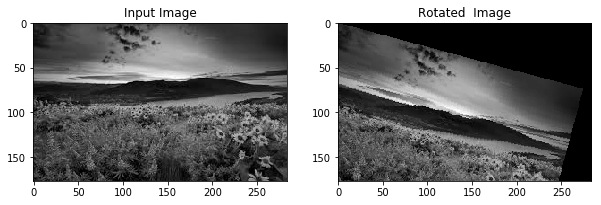

In [86]:
#Rotation using NN

rotationMask = np.float32([[math.cos(math.radians(15)), math.sin(math.radians(15)),0],[-1*math.sin(math.radians(15)),math.cos(math.radians(15)) , 0],[0, 0, 1]])
imageRotated = nearestNeighbour(inputImage,rotationMask) 

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Rotated  Image")
plt.imshow(imageRotated,cmap = plt.get_cmap('gray'))
plt.show()


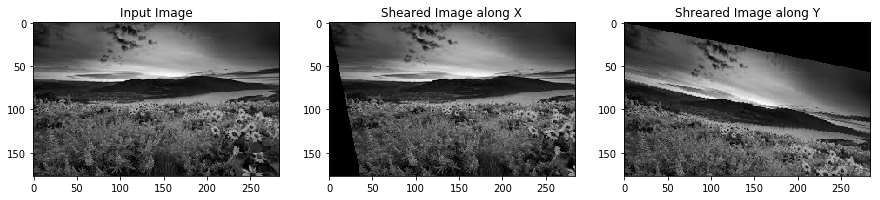

In [87]:
#Shearing uisng NN

shearedMaskX = np.float32([[1,0,0],[0.2,1,0],[0,0,1]])
imageShearedX = nearestNeighbour(inputImage,shearedMaskX) 

shearedMaskY = np.float32([[1,0.2,0],[0,1,0],[0,0,1]])
imageShearedY = nearestNeighbour(inputImage,shearedMaskY) 

f = plt.figure(figsize=(15,15))
f.add_subplot(1,3,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,3,2)
plt.title("Sheared Image along X")
plt.imshow(imageShearedX,cmap = plt.get_cmap('gray'))

f.add_subplot(1,3,3)
plt.title("Shreared Image along Y")
plt.imshow(imageShearedY,cmap = plt.get_cmap('gray'))
plt.show()

Affine Transformation (Nearest Neighbour)

[[ 1.159111    0.31058288 24.        ]
 [-0.31058288  1.159111   24.        ]
 [ 0.          0.          1.        ]]


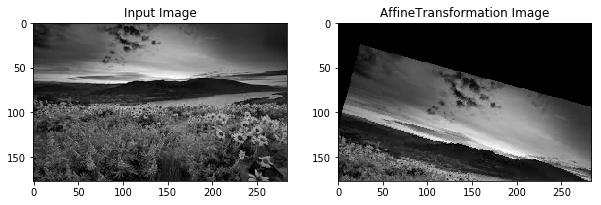

In [88]:
#Affine Mask Definition: Combination of scaling, translation and rotation

affineTransformationMask = np.matmul(np.matmul(scalingMask,translateMask),rotationMask)
affineNearestNeighbour = nearestNeighbour(inputImage,affineTransformationMask) 
print(affineTransformationMask)
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("AffineTransformation Image")
plt.imshow(affineNearestNeighbour,cmap = plt.get_cmap('gray'))
plt.show()

[[ 1.159111    0.31058288 24.        ]
 [-0.31058288  1.159111   24.        ]
 [ 0.          0.          1.        ]]


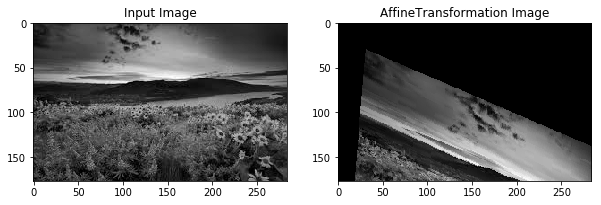

In [89]:
##Affine Mask Definition: Combination of shearing, scaling, translation and rotation

affineTransformationMask1 = np.matmul(np.matmul(np.matmul(np.matmul(shearedMaskX,shearedMaskY),scalingMask),translateMask),rotationMask)
affineNearestNeighbour1 = nearestNeighbour(inputImage,affineTransformationMask1) 
print(affineTransformationMask)
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("AffineTransformation Image")
plt.imshow(affineNearestNeighbour1,cmap = plt.get_cmap('gray'))
plt.show()

**Bilinear Transformation**

In [0]:
def BilinearTransformation(image, mask):
  #initialize the targetImage matrix with zeroes
    targetImage = np.zeros([len(image), len(image[0])])
    inverseMask = np.linalg.inv(mask)
    
    for row in range(targetImage.shape[0]):
      for column in range(targetImage.shape[1]):
        modifiedImage = np.float32([[row],[column],[1]])
        imageInput = np.matmul(inverseMask,modifiedImage)
        
        x= imageInput[0,0]
        y= imageInput[1,0]
        
        #print(x,y)
            
        x0 = np.floor(x).astype(int)
        x1 = np.ceil(x0).astype(int)
        y0 = np.floor(y).astype(int)
        y1 = np.ceil(y0).astype(int)
        
        if(x > 0 and x <= image.shape[0]-1 and y > 0 and y <= image.shape[1]-1):
          p1 = image[x0,y0]
          p2 = image[x0,y1]
          p3 = image[x1,y0]
          p4 = image[x1,y1]

            #print(np.float32([[1-x,x]])
          A = np.matmul(np.float32([[1-x,x]]),np.float32([[p1,p2],[p3,p4]]))
          B = np.float32([[1-y],[y]])
          targetImage[row,column] = np.matmul(A,B)
          final_img = targetImage.astype(int)
                        
                       
    return final_img

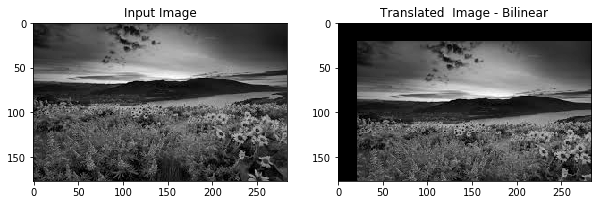

In [91]:
#Translation using Bilinear

translateMask = np.float32([[1,0,20],[0,1,20],[0,0,1]])
imageTranslated = BilinearTransformation(inputImage,translateMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Translated  Image - Bilinear")
plt.imshow(imageTranslated,cmap = plt.get_cmap('gray'))
plt.show()

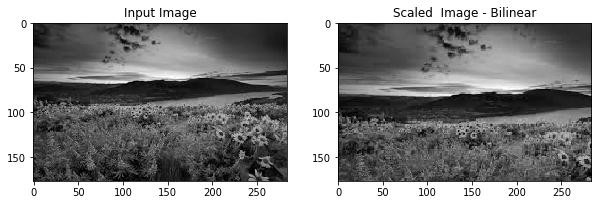

In [92]:
#Scaling using Bilinear

scalingMask = np.float32([[1.2,0,0],[0,1.2,0],[0,0,1]])
imageScaled = BilinearTransformation(inputImage,scalingMask) 

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Scaled  Image - Bilinear")
plt.imshow(imageScaled,cmap = plt.get_cmap('gray'))
plt.show()

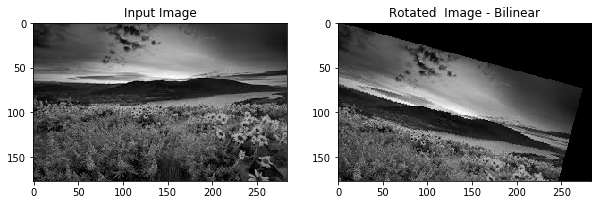

In [93]:
rotationMask = np.float32([[math.cos(math.radians(15)), math.sin(math.radians(15)),0],[-1*math.sin(math.radians(15)),math.cos(math.radians(15)) , 0],[0, 0, 1]])
imageRotated = BilinearTransformation(inputImage,rotationMask) 

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("Rotated  Image - Bilinear")
plt.imshow(imageRotated,cmap = plt.get_cmap('gray'))
plt.show()

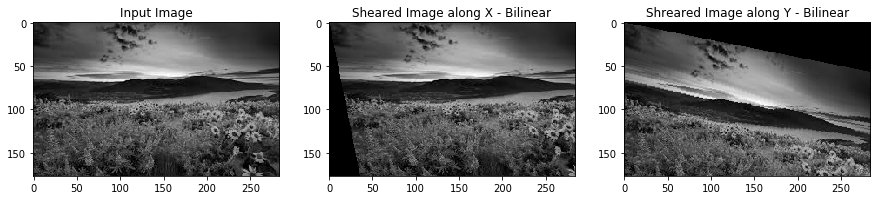

In [94]:
shearedMaskX = np.float32([[1,0,0],[0.2,1,0],[0,0,1]])
imageShearedX = BilinearTransformation(inputImage,shearedMaskX) 

shearedMaskY = np.float32([[1,0.2,0],[0,1,0],[0,0,1]])
imageShearedY = BilinearTransformation(inputImage,shearedMaskY) 

f = plt.figure(figsize=(15,15))
f.add_subplot(1,3,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,3,2)
plt.title("Sheared Image along X - Bilinear")
plt.imshow(imageShearedX,cmap = plt.get_cmap('gray'))

f.add_subplot(1,3,3)
plt.title("Shreared Image along Y - Bilinear")
plt.imshow(imageShearedY,cmap = plt.get_cmap('gray'))
plt.show()

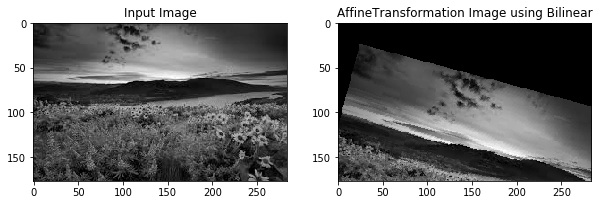

In [0]:
affineBilinear = BilinearTransformation(inputImage,affineTransformationMask) 

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("AffineTransformation Image using Bilinear")
plt.imshow(affineBilinear,cmap = plt.get_cmap('gray'))
plt.show()

[[ 1.159111    0.31058288 24.        ]
 [-0.31058288  1.159111   24.        ]
 [ 0.          0.          1.        ]]


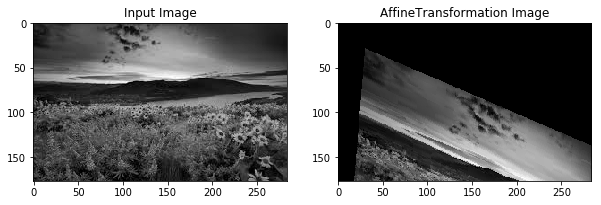

In [95]:
##Affine Mask Definition: Combination of shearing, scaling, translation and rotation

affineTransformationMask1 = np.matmul(np.matmul(np.matmul(np.matmul(shearedMaskX,shearedMaskY),scalingMask),translateMask),rotationMask)
affineNearestNeighbourB = BilinearTransformation(inputImage,affineTransformationMask1) 
print(affineTransformationMask)
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

f.add_subplot(1,2,2)
plt.title("AffineTransformation Image")
plt.imshow(affineNearestNeighbourB,cmap = plt.get_cmap('gray'))
plt.show()

**Difference in the images generated using Nearest Neighbor and Bilinear Transformation**

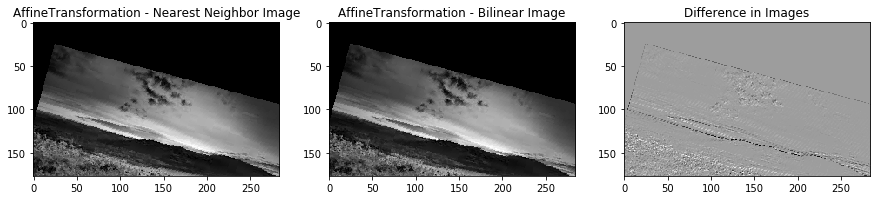

In [96]:
#Nearest Neighbour
f = plt.figure(figsize=(15,15))
f.add_subplot(1,3,1)
plt.title("AffineTransformation - Nearest Neighbor Image")
plt.imshow(affineNearestNeighbour,cmap = plt.get_cmap('gray'))

#Bilinear Transformation
f.add_subplot(1,3,2)
plt.title("AffineTransformation - Bilinear Image")
plt.imshow(affineBilinear,cmap = plt.get_cmap('gray'))

#Difference between the two transformations used

difference = np.subtract(affineNearestNeighbour,affineBilinear)
f.add_subplot(1,3,3)
plt.title("Difference in Images")
plt.imshow(difference,cmap = plt.get_cmap('gray'))
plt.show()


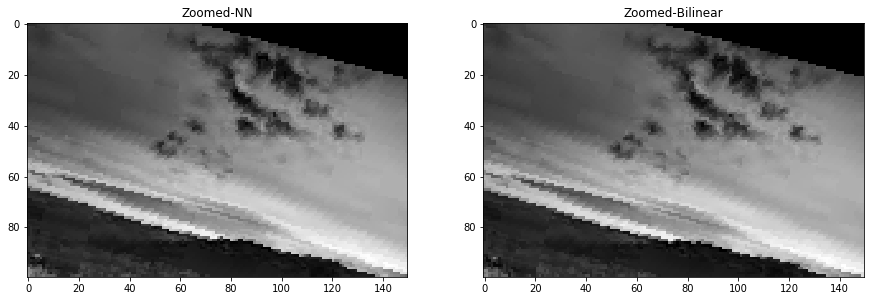

In [97]:
#Zoomed Images to clearly see the difference

croppedNN = affineNearestNeighbour[50:150,50:200]
cropppedBilinear = affineBilinear[50:150,50:200]

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2,1)
plt.title("Zoomed-NN")
plt.imshow(croppedNN,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2,2)
plt.title("Zoomed-Bilinear")
plt.imshow(cropppedBilinear,cmap = plt.get_cmap('gray'))
plt.show()


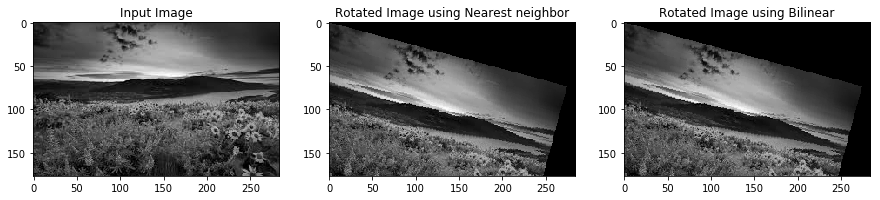

In [98]:
f = plt.figure(figsize=(15,15))
f.add_subplot(1,3,1)
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))

#Rotation with Nearest Neighbour
f.add_subplot(1,3,2)
plt.title("Rotated Image using Nearest neighbor")
plt.imshow(imageRotated,cmap = plt.get_cmap('gray'))

#Roatation with Bilinear Transformation
rotated_image_Bi = BilinearTransformation(inputImage,rotationMask) 
f.add_subplot(1,3,3)
plt.title("Rotated Image using Bilinear")
plt.imshow(rotated_image_Bi,cmap = plt.get_cmap('gray'))
plt.show()


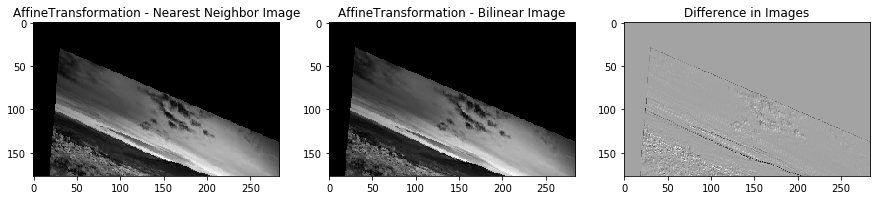

In [99]:
#Using all 4 transformations: shearing, scaling, translation and rotation
#Nearest Neighbour
f = plt.figure(figsize=(15,15))
f.add_subplot(1,3,1)
plt.title("AffineTransformation - Nearest Neighbor Image")
plt.imshow(affineNearestNeighbour1,cmap = plt.get_cmap('gray'))

#Bilinear Transformation
f.add_subplot(1,3,2)
plt.title("AffineTransformation - Bilinear Image")
plt.imshow(affineNearestNeighbourB,cmap = plt.get_cmap('gray'))

#Difference between the two transformations used

difference1 = np.subtract(affineNearestNeighbour1,affineNearestNeighbourB)
f.add_subplot(1,3,3)
plt.title("Difference in Images")
plt.imshow(difference1,cmap = plt.get_cmap('gray'))
plt.show()